<a href="https://colab.research.google.com/github/satyamsrj/-Teen-Smartphone-Usage-Analysis/blob/main/emotion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.zip to test.zip


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.zip to train.zip


In [ ]:
import os
import zipfile

# dir
if not os.path.exists('images'):
    os.makedirs('images')

# unzip train.zip
zip_file_name_train = 'train.zip'
if os.path.exists(zip_file_name_train):
    with zipfile.ZipFile(zip_file_name_train, 'r') as zip_ref:
        zip_ref.extractall('images')
    print(f"'{zip_file_name_train}' unzipped into 'images' directory.")
else:
    print(f"Error: '{zip_file_name_train}' not found.")


# unzip test.zip
zip_file_name_test = 'test.zip'
if os.path.exists(zip_file_name_test):
    with zipfile.ZipFile(zip_file_name_test, 'r') as zip_ref:
        zip_ref.extractall('images')
    print(f"'{zip_file_name_test}' unzipped into 'images' directory.")
else:
    print(f"Error: '{zip_file_name_test}' not found.")

'train.zip' unzipped into 'images' directory.
'test.zip' unzipped into 'images' directory.


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd

train_dir = 'images/train'
test_dir = 'images/test'

def createdataframe(dir):
    image_paths = []
    labels= []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

train=pd.DataFrame()
train['image'],train['label']=createdataframe(train_dir)

test=pd.DataFrame()
test['image'],test['label']=createdataframe(test_dir)


# Create ImageDataGenerators
# You might want to add data augmentation options here for training_datagen
training_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_dataframe(
    dataframe=train,
    directory=None,  # Since image paths in dataframe are absolute
    x_col='image',
    y_col='label',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset=None, # Using the full dataframe as training data
    shuffle=True
)

# Assuming you want to use the 'test' dataframe for validation
val_generator = validation_datagen.flow_from_dataframe(
    dataframe=test,
    directory=None, # Since image paths in dataframe are absolute
    x_col='image',
    y_col='label',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset=None, # Using the full dataframe as validation data
    shuffle=False # No need to shuffle validation data
)

disgust completed
sad completed
happy completed
fear completed
neutral completed
angry completed
surprise completed
disgust completed
sad completed
happy completed
fear completed
neutral completed
angry completed
surprise completed
Found 28821 validated image filenames belonging to 7 classes.
Found 7066 validated image filenames belonging to 7 classes.


In [ ]:

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img  # Using from tensorflow.keras instead of keras_preprocessing
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential  # Note: 'Sequential' should be capitalized
import os
import pandas as pd
import numpy as np

train_dir = 'images/train'
test_dir = 'images/test'

def createdataframe(dir):
    image_paths = []
    labels= []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

train=pd.DataFrame()
train['image'],train['label']=createdataframe(train_dir)

print(train)
print(train['image'])


test=pd.DataFrame()
test['image'],test['label']=createdataframe(test_dir)


print(test)
print(test['image'])


from tqdm.notebook import tqdm


from tensorflow.keras.utils import load_img
import numpy as np
from tqdm import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(-1, 48, 48, 1)
    return features


train_features = extract_features(train['image'])


test_features= extract_features(test['image'])


x_train = train_features/255.0
x_test=test_features/255.0



from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
le.fit(train['label'])


y_train=le.transform(train['label'])
y_test=le.transform(test['label'])


y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

# creatingModel
model = Sequential([

    Input(shape=(48, 48, 1)),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),


    Flatten(),


    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(7, activation='softmax')
])



disgust completed
sad completed
happy completed
fear completed
neutral completed
angry completed
surprise completed
                                 image     label
0       images/train/disgust/16591.jpg   disgust
1       images/train/disgust/31205.jpg   disgust
2        images/train/disgust/5958.jpg   disgust
3       images/train/disgust/20103.jpg   disgust
4       images/train/disgust/14917.jpg   disgust
...                                ...       ...
28816  images/train/surprise/14687.jpg  surprise
28817  images/train/surprise/20757.jpg  surprise
28818  images/train/surprise/32749.jpg  surprise
28819  images/train/surprise/30513.jpg  surprise
28820   images/train/surprise/3270.jpg  surprise

[28821 rows x 2 columns]
0         images/train/disgust/16591.jpg
1         images/train/disgust/31205.jpg
2          images/train/disgust/5958.jpg
3         images/train/disgust/20103.jpg
4         images/train/disgust/14917.jpg
                      ...               
28816    images/train/su

100%|██████████| 7066/7066 [00:02<00:00, 2792.56it/s]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion
])

# Compil
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_generator,
          validation_data=val_generator,
          epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 113s 123ms/step - accuracy: 0.2636 - loss: 1.7939 - val_accuracy: 0.4188 - val_loss: 1.4805
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 109s 121ms/step - accuracy: 0.4323 - loss: 1.4705 - val_accuracy: 0.4969 - val_loss: 1.3289
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 146s 126ms/step - accuracy: 0.4876 - loss: 1.3451 - val_accuracy: 0.5044 - val_loss: 1.3019
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.5137 - loss: 1.2785 - val_accuracy: 0.5376 - val_loss: 1.2330
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.5366 - loss: 1.2062 - val_accuracy: 0.5449 - val_loss: 1.2049


In [ ]:
model.fit(train_generator,validation_data=val_generator,epochs=5)  # more

Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 112s 125ms/step - accuracy: 0.5560 - loss: 1.1634 - val_accuracy: 0.5409 - val_loss: 1.2021
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.5730 - loss: 1.1188 - val_accuracy: 0.5562 - val_loss: 1.1707
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 143s 122ms/step - accuracy: 0.5933 - loss: 1.0781 - val_accuracy: 0.5610 - val_loss: 1.1646
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 112s 125ms/step - accuracy: 0.6059 - loss: 1.0321 - val_accuracy: 0.5651 - val_loss: 1.1671
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 109s 121ms/step - accuracy: 0.6152 - loss: 1.0093 - val_accuracy: 0.5682 - val_loss: 1.1913


In [ ]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 111s 123ms/step - accuracy: 0.6278 - loss: 0.9791 - val_accuracy: 0.5546 - val_loss: 1.1826
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 111s 123ms/step - accuracy: 0.6371 - loss: 0.9512 - val_accuracy: 0.5650 - val_loss: 1.1988
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 111s 123ms/step - accuracy: 0.6497 - loss: 0.9139 - val_accuracy: 0.5651 - val_loss: 1.2086
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 144s 126ms/step - accuracy: 0.6606 - loss: 0.8740 - val_accuracy: 0.5686 - val_loss: 1.2252
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 112s 125ms/step - accuracy: 0.6718 - loss: 0.8553 - val_accuracy: 0.5681 - val_loss: 1.2227


In [ ]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 113s 125ms/step - accuracy: 0.6790 - loss: 0.8265 - val_accuracy: 0.5703 - val_loss: 1.2555
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 112s 125ms/step - accuracy: 0.6891 - loss: 0.7984 - val_accuracy: 0.5705 - val_loss: 1.2656
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 116s 129ms/step - accuracy: 0.6942 - loss: 0.7943 - val_accuracy: 0.5689 - val_loss: 1.2889
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 119s 132ms/step - accuracy: 0.7103 - loss: 0.7492 - val_accuracy: 0.5797 - val_loss: 1.3724
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 121s 134ms/step - accuracy: 0.7181 - loss: 0.7378 - val_accuracy: 0.5760 - val_loss: 1.3814


In [ ]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 119s 132ms/step - accuracy: 0.7226 - loss: 0.7139 - val_accuracy: 0.5740 - val_loss: 1.4707
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.7343 - loss: 0.6897 - val_accuracy: 0.5633 - val_loss: 1.4126
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 118s 131ms/step - accuracy: 0.7336 - loss: 0.6722 - val_accuracy: 0.5709 - val_loss: 1.4804
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 114s 127ms/step - accuracy: 0.7444 - loss: 0.6485 - val_accuracy: 0.5651 - val_loss: 1.5248
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 112s 124ms/step - accuracy: 0.7492 - loss: 0.6419 - val_accuracy: 0.5634 - val_loss: 1.4923


In [ ]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 117s 130ms/step - accuracy: 0.7533 - loss: 0.6239 - val_accuracy: 0.5682 - val_loss: 1.5529
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 118s 131ms/step - accuracy: 0.7562 - loss: 0.6047 - val_accuracy: 0.5826 - val_loss: 1.6519
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 119s 132ms/step - accuracy: 0.7685 - loss: 0.5906 - val_accuracy: 0.5773 - val_loss: 1.6815
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 119s 132ms/step - accuracy: 0.7722 - loss: 0.5692 - val_accuracy: 0.5681 - val_loss: 1.5874
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 119s 132ms/step - accuracy: 0.7708 - loss: 0.5778 - val_accuracy: 0.5764 - val_loss: 1.8290


In [ ]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 116s 129ms/step - accuracy: 0.7809 - loss: 0.5506 - val_accuracy: 0.5607 - val_loss: 1.6866
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 144s 131ms/step - accuracy: 0.7863 - loss: 0.5421 - val_accuracy: 0.5720 - val_loss: 1.7389
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 119s 132ms/step - accuracy: 0.7849 - loss: 0.5430 - val_accuracy: 0.5706 - val_loss: 1.8411
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 119s 132ms/step - accuracy: 0.7903 - loss: 0.5186 - val_accuracy: 0.5702 - val_loss: 1.8466
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 118s 131ms/step - accuracy: 0.7907 - loss: 0.5211 - val_accuracy: 0.5634 - val_loss: 1.8001


In [ ]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 115s 127ms/step - accuracy: 0.7943 - loss: 0.5164 - val_accuracy: 0.5709 - val_loss: 1.9448
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 108s 120ms/step - accuracy: 0.7955 - loss: 0.5049 - val_accuracy: 0.5726 - val_loss: 1.9335
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 112s 124ms/step - accuracy: 0.8049 - loss: 0.4934 - val_accuracy: 0.5744 - val_loss: 2.0824
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.8035 - loss: 0.4875 - val_accuracy: 0.5723 - val_loss: 2.0099
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 111s 123ms/step - accuracy: 0.8083 - loss: 0.4827 - val_accuracy: 0.5701 - val_loss: 2.0240


In [ ]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 108s 120ms/step - accuracy: 0.8095 - loss: 0.4833 - val_accuracy: 0.5725 - val_loss: 2.1159
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.8139 - loss: 0.4689 - val_accuracy: 0.5743 - val_loss: 2.0395
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 109s 121ms/step - accuracy: 0.8241 - loss: 0.4436 - val_accuracy: 0.5708 - val_loss: 2.2272
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.8110 - loss: 0.4648 - val_accuracy: 0.5706 - val_loss: 2.1559
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 106s 118ms/step - accuracy: 0.8232 - loss: 0.4417 - val_accuracy: 0.5732 - val_loss: 2.1403


In [ ]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 108s 120ms/step - accuracy: 0.8217 - loss: 0.4530 - val_accuracy: 0.5696 - val_loss: 2.0616
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 142s 120ms/step - accuracy: 0.8184 - loss: 0.4427 - val_accuracy: 0.5644 - val_loss: 2.2698
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.8228 - loss: 0.4377 - val_accuracy: 0.5671 - val_loss: 2.2568
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 150s 131ms/step - accuracy: 0.8241 - loss: 0.4323 - val_accuracy: 0.5729 - val_loss: 2.4188
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 117s 130ms/step - accuracy: 0.8291 - loss: 0.4234 - val_accuracy: 0.5616 - val_loss: 2.3167


In [ ]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 116s 129ms/step - accuracy: 0.8314 - loss: 0.4157 - val_accuracy: 0.5696 - val_loss: 2.3965
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 116s 129ms/step - accuracy: 0.8256 - loss: 0.4296 - val_accuracy: 0.5695 - val_loss: 2.3151
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 119s 132ms/step - accuracy: 0.8403 - loss: 0.4064 - val_accuracy: 0.5654 - val_loss: 2.4924
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 108s 120ms/step - accuracy: 0.8364 - loss: 0.4054 - val_accuracy: 0.5718 - val_loss: 2.3917
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 117s 130ms/step - accuracy: 0.8319 - loss: 0.4131 - val_accuracy: 0.5737 - val_loss: 2.5780


In [ ]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 118s 131ms/step - accuracy: 0.8377 - loss: 0.3979 - val_accuracy: 0.5684 - val_loss: 2.4624
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 118s 131ms/step - accuracy: 0.8370 - loss: 0.4049 - val_accuracy: 0.5698 - val_loss: 2.4629
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 117s 130ms/step - accuracy: 0.8429 - loss: 0.3984 - val_accuracy: 0.5685 - val_loss: 2.7044
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 118s 131ms/step - accuracy: 0.8470 - loss: 0.3878 - val_accuracy: 0.5679 - val_loss: 2.5050
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 107s 118ms/step - accuracy: 0.8437 - loss: 0.3876 - val_accuracy: 0.5665 - val_loss: 2.5759


In [ ]:
# make epochs=50+

In [ ]:
model.save("emotion_model.keras")

In [ ]:
import os
print(os.getcwd())

/content


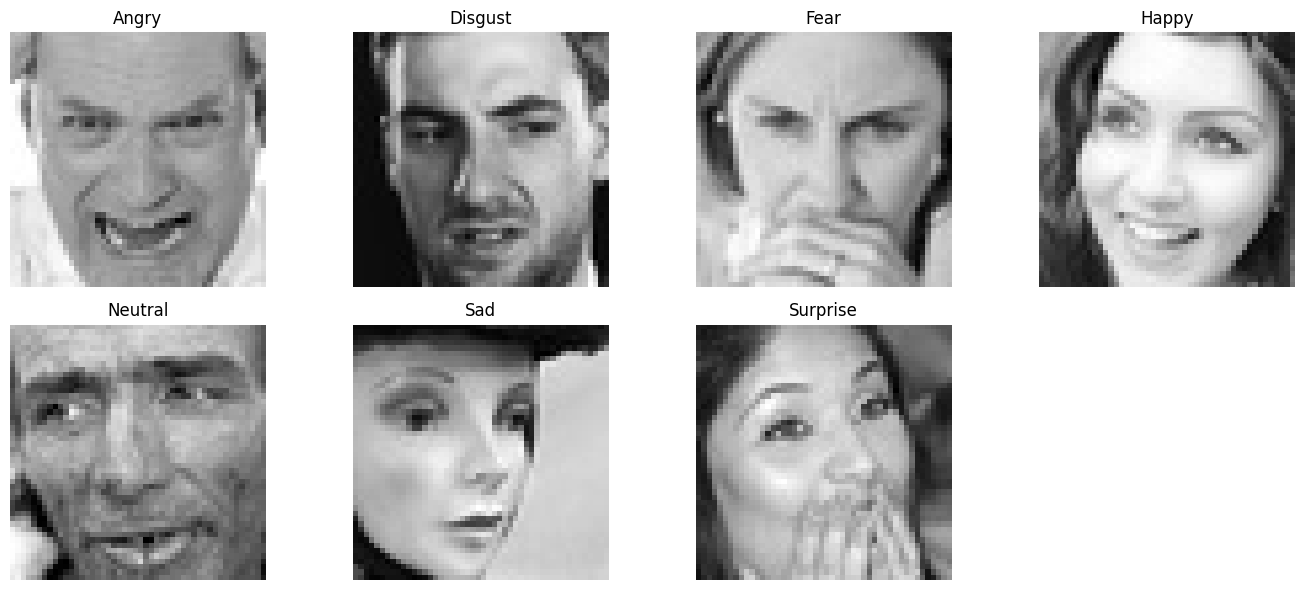

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import os

# Emotion labels and base path
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
base_path = 'images/train'

# Set up the plot
plt.figure(figsize=(14, 6))

for i, emotion in enumerate(labels):
    # Grab first image from each emotion folder
    folder = os.path.join(base_path, emotion)
    image_name = os.listdir(folder)[0]  # Assumes at least one image exists
    image_path = os.path.join(folder, image_name)

    # Load and plot
    img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
    plt.subplot(2, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(emotion.capitalize())
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


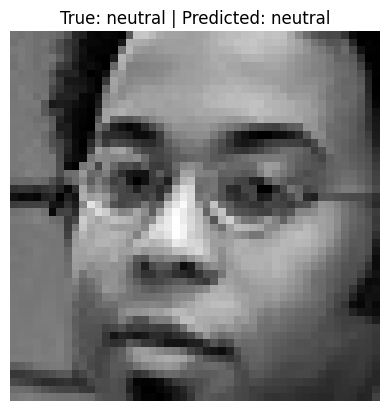

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get one batch using Python's next() function
x_batch, y_batch = next(train_generator)

# Select one image and its true label
img = x_batch[0]
true_label_index = np.argmax(y_batch[0])

# Map class indices to label names
label_map = {v: k for k, v in train_generator.class_indices.items()}
true_label_name = label_map[true_label_index]

# Predict using the model
pred = model.predict(np.expand_dims(img, axis=0))
pred_label_index = np.argmax(pred)
pred_label_name = label_map[pred_label_index]

# Display the image and prediction
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"True: {true_label_name} | Predicted: {pred_label_name}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


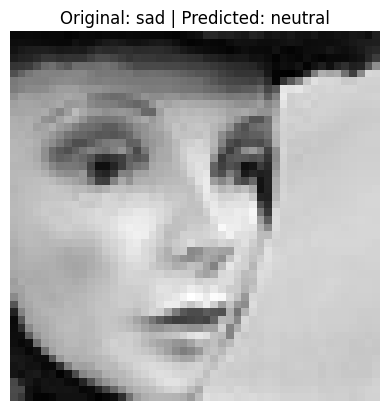

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Choose a sample image from the 'sad' class
original_emotion = 'sad'
image_folder = os.path.join('images/train', original_emotion)
image_file = os.listdir(image_folder)[0]  # Pick the first image
image_path = os.path.join(image_folder, image_file)

# Load and preprocess the image
img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 48, 48, 1)

# Predict using the model
pred = model.predict(img_array)
pred_label_index = np.argmax(pred)

# Map index to label
label_map = {v: k for k, v in train_generator.class_indices.items()}
predicted_emotion = label_map[pred_label_index]

# Display result
plt.imshow(img_array[0].reshape(48, 48), cmap='gray')
plt.title(f"Original: {original_emotion} | Predicted: {predicted_emotion}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


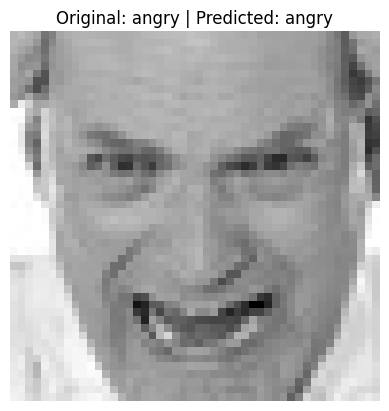

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


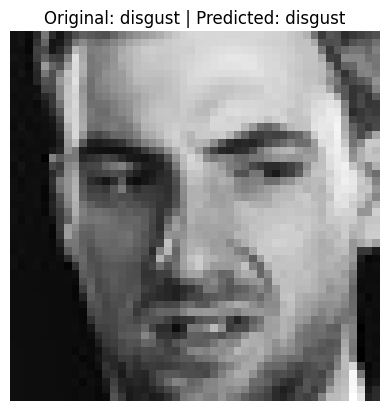

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


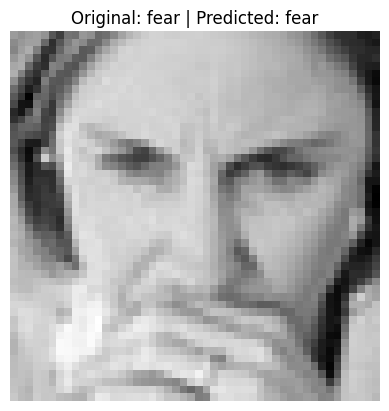

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


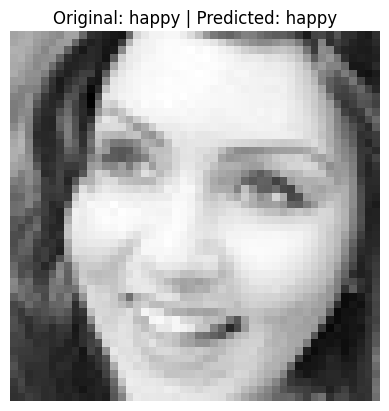

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


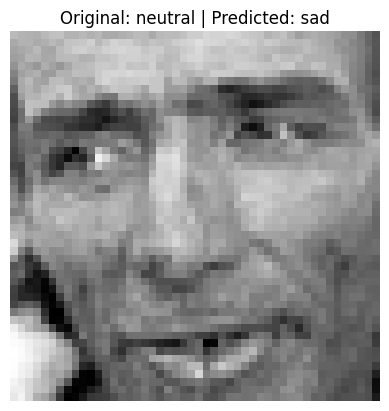

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


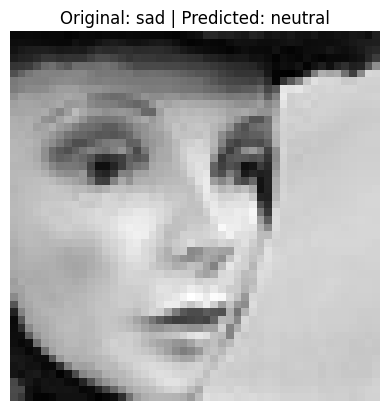

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


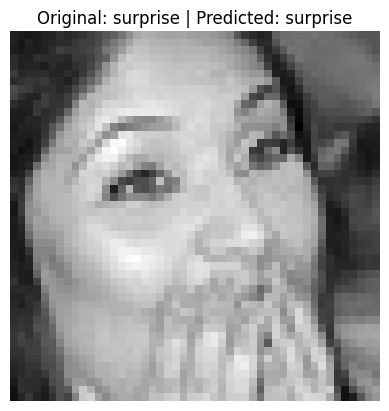

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Emotion labels and base path
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
base_path = 'images/train'

# Reverse class index map from generator
label_map = {v: k for k, v in train_generator.class_indices.items()}

# Loop through each emotion class
for emotion in emotions:
    folder = os.path.join(base_path, emotion)
    image_file = os.listdir(folder)[0]  # Pick the first image
    image_path = os.path.join(folder, image_file)

    # Load and preprocess image
    img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)
    pred_label_index = np.argmax(pred)
    predicted_emotion = label_map[pred_label_index]

    # Display
    plt.imshow(img_array[0].reshape(48, 48), cmap='gray')
    plt.title(f"Original: {emotion} | Predicted: {predicted_emotion}")
    plt.axis('off')
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract trial data
trial_data = []
for trial in tuner.oracle.get_best_trials(num_trials=10):
    hp = trial.hyperparameters.values
    acc = trial.metrics.get_last_value('val_accuracy')
    trial_data.append({**hp, 'val_accuracy': acc})

df = pd.DataFrame(trial_data)

# Plot accuracy vs dropout
plt.figure(figsize=(8,5))
plt.scatter(df['dropout'], df['val_accuracy'], c='blue')
plt.xlabel('Dropout Rate')
plt.ylabel('Validation Accuracy')
plt.title('Dropout vs Accuracy')
plt.grid(True)
plt.show()

NameError: name 'tuner' is not defined

In [ ]:
#   THE MODEL HAS BEEN SAVED TO DEPLOY